In [9]:
import os
print(os.getcwd())


f:\KAIM\Predicting-Price-Moves-\notebooks


In [10]:
tickers = ['AAPL', 'MSFT', 'GOOGL','AMZN','META','NVDA','TSLA'] 
for ticker in tickers:
    print(f"\n========== Processing: {ticker} ==========\n")


========== Processing: AAPL ==========


========== Processing: MSFT ==========


========== Processing: GOOGL ==========


========== Processing: AMZN ==========


========== Processing: META ==========


========== Processing: NVDA ==========


========== Processing: TSLA ==========



In [11]:
import pandas as pd
from pathlib import Path

path = Path("data/yfinance_data/...")
print(path.resolve())
print(path.exists())
df = pd.read_csv("../data/raw_analyst_ratings.csv", parse_dates=["date"])



F:\KAIM\Predicting-Price-Moves-\notebooks\data\yfinance_data\...
False


In [12]:
print(df.head)

<bound method NDFrame.head of          Unnamed: 0                                           headline  \
0                 0            Stocks That Hit 52-Week Highs On Friday   
1                 1         Stocks That Hit 52-Week Highs On Wednesday   
2                 2                      71 Biggest Movers From Friday   
3                 3       46 Stocks Moving In Friday's Mid-Day Session   
4                 4  B of A Securities Maintains Neutral on Agilent...   
...             ...                                                ...   
1407323     1413844             Top Narrow Based Indexes For August 29   
1407324     1413845  Recap: Wednesday's Top Percentage Gainers and ...   
1407325     1413846  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326     1413847  Oppenheimer Initiates China Zenix At Outperfor...   
1407327     1413848  China Zenix Auto International Opens For Tradi...   

                                                       url          publisher  \


In [13]:
import pandas as pd
from eda import plot_daily_news_volume, plot_top_stocks, plot_publisher_distribution
!pip install c:\Users\user\Downloads\ta_lib-0.6.3-cp311-cp311-win_amd64.whl
!pip install yfinance

'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
import yfinance as yf

df_price = yf.download(ticker, start="2011-01-01", end="2024-06-30")
df_price.reset_index(inplace=True)
df_price.rename(columns=str.lower, inplace=True)
df_price = df_price[['date', 'close', 'high', 'low', 'open', 'volume']]
df_price['date'] = pd.to_datetime(df_price['date']).dt.date
df_price = df_price.sort_values('date').reset_index(drop=True)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [15]:
print(df_price)

Price         date       close        high         low        open    volume
Ticker                    tsla        tsla        tsla        tsla      tsla
0       2011-01-03    1.774667    1.800000    1.726667    1.789333  19245000
1       2011-01-04    1.778000    1.796667    1.734667    1.777333  17811000
2       2011-01-05    1.788667    1.793333    1.746000    1.765333  21700500
3       2011-01-06    1.858667    1.866667    1.787333    1.788667  30918000
4       2011-01-07    1.882667    1.905333    1.860000    1.866667  33718500
...            ...         ...         ...         ...         ...       ...
3389    2024-06-24  182.580002  188.800003  182.550003  184.970001  61992100
3390    2024-06-25  187.350006  187.970001  182.009995  184.399994  63678300
3391    2024-06-26  196.369995  197.759995  186.360001  186.539993  95737100
3392    2024-06-27  197.419998  198.720001  194.050003  195.169998  72746500
3393    2024-06-28  197.880005  203.199997  195.259995  199.550003  95438100

In [16]:
# Flatten the MultiIndex columns
df_price.columns = df_price.columns.get_level_values(1)

# Make column names lowercase
df_price.columns = [col.lower() for col in df_price.columns]
df_price.columns = ['date', 'close', 'high', 'low', 'open', 'volume']

# Ensure 'date' is in datetime format
df_price['date'] = pd.to_datetime(df_price['date'])

# Optional: sort by date
df_price = df_price.sort_values('date').reset_index(drop=True)

# Check
print(df_price.columns)
print(df_price.head())


Index(['date', 'close', 'high', 'low', 'open', 'volume'], dtype='object')
        date     close      high       low      open    volume
0 2011-01-03  1.774667  1.800000  1.726667  1.789333  19245000
1 2011-01-04  1.778000  1.796667  1.734667  1.777333  17811000
2 2011-01-05  1.788667  1.793333  1.746000  1.765333  21700500
3 2011-01-06  1.858667  1.866667  1.787333  1.788667  30918000
4 2011-01-07  1.882667  1.905333  1.860000  1.866667  33718500


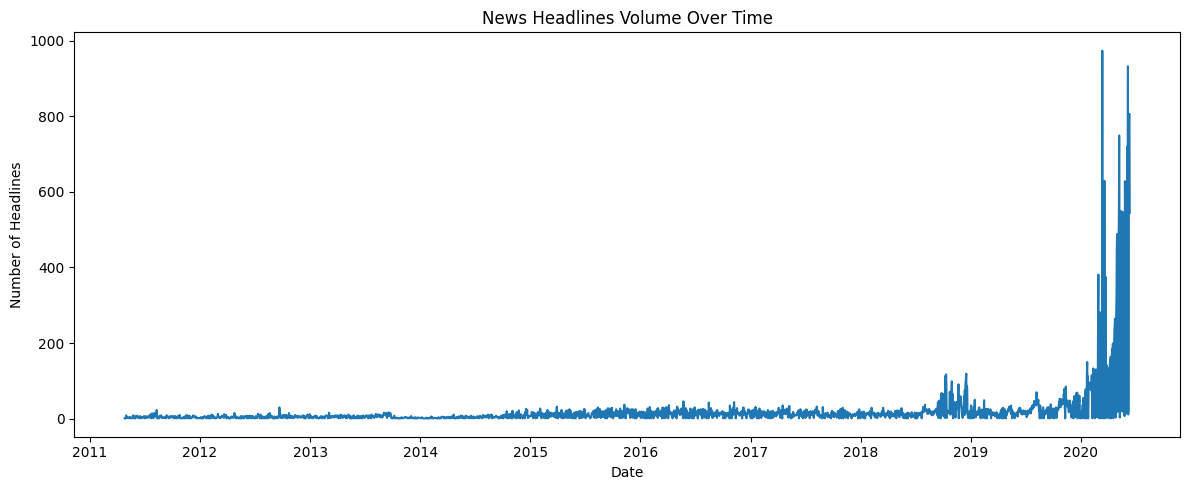

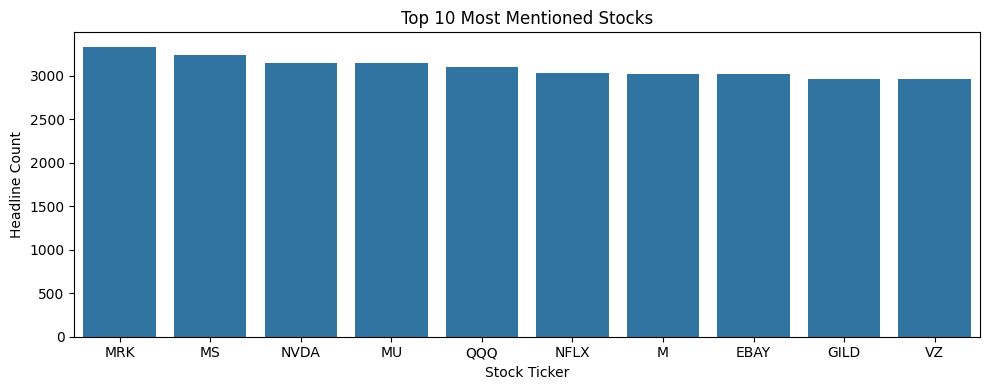

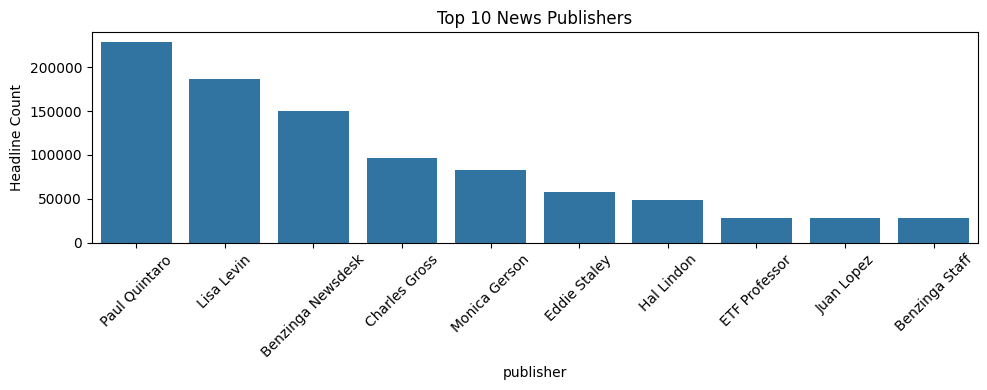

In [17]:

import talib
import pandas as pd

from quant_stat import add_technical_indicators, describe_price_statistics
from eda import plot_top_stocks, plot_daily_news_volume, plot_publisher_distribution, plot_headline_length_distribution

df_news = pd.read_csv("../data/raw_analyst_ratings.csv", parse_dates=["date"])
df_news['date'] = pd.to_datetime(df_news['date'], errors='coerce')

plot_daily_news_volume(df_news)
plot_top_stocks(df_news)
plot_publisher_distribution(df_news)

In [18]:
from corr import add_more_indicators
df_price = add_technical_indicators(df_price)
df_price = add_more_indicators(df_price)
df_price['norm_return'] = (df_price['close'] / df_price['close'].iloc[0]) - 1
describe_price_statistics(df_price)

,close,daily_return,sma_10,ema_10,atr
count,3394.000000,3393.000000,3385.000000,3385.000000,3380.000000
mean,77.294772,0.002011,77.243639,77.246529,3.801904
std,102.862908,0.035329,102.695370,102.595162,5.369367
min,1.455333,-0.210628,1.513333,1.520073,0.055183
25%,12.821666,-0.015634,12.935600,12.981243,0.451486
50%,17.936666,0.001216,18.070733,18.053568,0.674728
75%,166.652504,0.018943,167.170999,167.937455,7.553710
max,409.970001,0.243951,383.062668,378.726227,22.793229


In [19]:
from analyzer import apply_sentiment_analysis
df_news = apply_sentiment_analysis(df_news)

print(df_news)

         Unnamed: 0                                           headline  \
0                 0            Stocks That Hit 52-Week Highs On Friday   
1                 1         Stocks That Hit 52-Week Highs On Wednesday   
2                 2                      71 Biggest Movers From Friday   
3                 3       46 Stocks Moving In Friday's Mid-Day Session   
4                 4  B of A Securities Maintains Neutral on Agilent...   
...             ...                                                ...   
1407323     1413844             Top Narrow Based Indexes For August 29   
1407324     1413845  Recap: Wednesday's Top Percentage Gainers and ...   
1407325     1413846  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326     1413847  Oppenheimer Initiates China Zenix At Outperfor...   
1407327     1413848  China Zenix Auto International Opens For Tradi...   

                                                       url          publisher  \
0        https://www.benzinga.

In [20]:
df_news.columns

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock',
       'date_only', 'sentiment'],
      dtype='object')

In [54]:
import pandas as pd
from analyzer import apply_sentiment_analysis

# Load and clean news data
df_news = pd.read_csv("../data/raw_analyst_ratings.csv", parse_dates=["date"])
df_news['date'] = pd.to_datetime(df_news['date'], errors='coerce').dt.date

# Normalize stock column first
df_news['stock'] = df_news['stock'].str.upper().str.strip()

# Apply sentiment analysis
df_news = apply_sentiment_analysis(df_news)

# Filter only relevant ticker (ensure this is inside your loop over tickers)
df_news_ticker = df_news[df_news['stock'] == ticker]
print(df_news[['headline', 'sentiment']].dropna().head())
# Group sentiment by date
daily_sentiment = df_news_ticker.groupby('date')['sentiment'].mean().reset_index()

                                            headline  sentiment
0            Stocks That Hit 52-Week Highs On Friday        0.0
1         Stocks That Hit 52-Week Highs On Wednesday        0.0
2                      71 Biggest Movers From Friday        0.0
3       46 Stocks Moving In Friday's Mid-Day Session        0.0
4  B of A Securities Maintains Neutral on Agilent...        0.0


In [45]:
# Clean and convert 'date' columns properly
df_news['date'] = pd.to_datetime(df_news['date'], errors='coerce')
df_price['date'] = pd.to_datetime(df_price['date'])  # Ensure datetime64[ns]

# Filter for the current ticker
df_news_ticker = df_news[df_news['stock'] == ticker]

# Group sentiment scores
daily_sentiment = df_news_ticker.groupby('date')['sentiment'].mean().reset_index()

# Make sure both 'date' columns are the same type
daily_sentiment['date'] = pd.to_datetime(daily_sentiment['date'])

# Merge
df_merged = pd.merge(df_price, daily_sentiment, on='date', how='left')


In [47]:
subset = df_corr_ready[['sentiment', 'rsi_14', 'macd', 'macd_signal', 'macd_hist']].dropna()
print(subset.shape)
print(subset.corr())

(1, 5)
             sentiment  rsi_14  macd  macd_signal  macd_hist
sentiment          NaN     NaN   NaN          NaN        NaN
rsi_14             NaN     NaN   NaN          NaN        NaN
macd               NaN     NaN   NaN          NaN        NaN
macd_signal        NaN     NaN   NaN          NaN        NaN
macd_hist          NaN     NaN   NaN          NaN        NaN


f:\Ana\envs\stoke-env\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
f:\Ana\envs\stoke-env\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


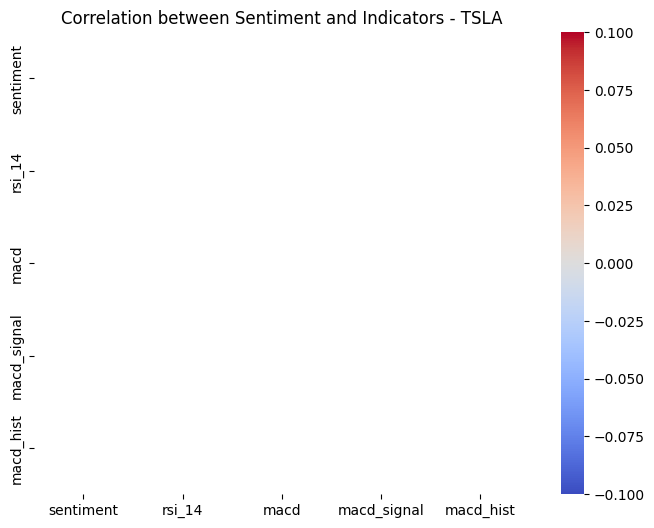

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from corr import add_more_indicators
df_corr_ready = df_merged.dropna(subset=['sentiment', 'rsi_14', 'macd', 'macd_signal', 'macd_hist'])

correlation_results = df_corr_ready[['sentiment', 'rsi_14', 'macd', 'macd_signal', 'macd_hist']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_results, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f"Correlation between Sentiment and Indicators - {ticker}")
plt.show()
